In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("loan_train.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [7]:
# convert to date time object
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


In [8]:
# Data visualization and preprocessing
df['loan_status'].value_counts()
# 260 people have paid off the loan and 86 have gone into collection

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

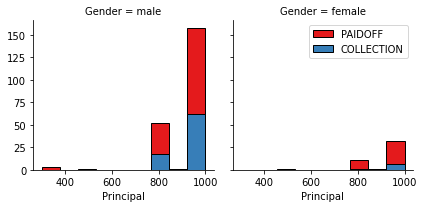

In [9]:
# can also be written as df['Principal']
# create 10 equal bins
bins = np.linspace(df.Principal.min(),df.Principal.max(),10)
# hue tells seaborn what data you want to color by
ax = sns.FacetGrid(df,col='Gender',hue="loan_status" ,palette="Set1", col_wrap=2)
ax.map(plt.hist,'Principal', bins = bins,  ec='k')
ax.axes[-1].legend()

In [10]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype=object)

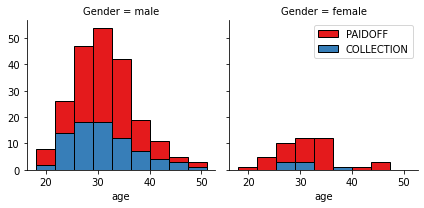

In [11]:
bins = np.linspace(df.age.min(),df.age.max(),10)
ax = sns.FacetGrid(df, col='Gender', hue='loan_status', palette="Set1", col_wrap = 2)
ax.map(plt.hist,'age',bins=bins, ec='k')

ax.axes[1].legend()

## Preprocessing: Feature selection/extraction

##### Look at the day of the week people get the loan

In [12]:
# Look at the day of the week people get the loan
# pandas.Series.dt.dayofweek: returns the day of the week assuming the week starts on Monday
# which is denoted by 0 and ends on Sunday which is denoted by 6
df['dayofweek'] = df['effective_date'].dt.dayofweek

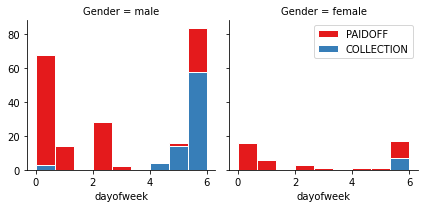

In [13]:
bins = np.linspace(df.dayofweek.min(),df.dayofweek.max(),10)
ax = sns.FacetGrid(df, col='Gender', hue='loan_status', palette="Set1", col_wrap=2)

ax.map(plt.hist, 'dayofweek', bins=bins, ec='w')
ax.axes[-1].legend()

In [14]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


we see that people who got the loan at the end of the week don't pay it off. so lets use feature binarization to set a threshold values less than day 4

In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x:1 if(x>3) else 0)

In [16]:
df['weekend']

0      0
1      0
2      0
3      1
4      1
      ..
341    1
342    1
343    0
344    0
345    0
Name: weekend, Length: 346, dtype: int64

In [17]:
# convert categorical features to numerical values
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% of females pay their loans while only 73% of males pay their loan

Lets convert male to 0 and female to 1

In [18]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)

In [19]:
# One hot encoding
# education
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [20]:
# feature before one hot encoding
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


use this hot encoding technique to convert categorical variables to binary variables and append them to the feature dataframe

In [21]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature =  pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis=1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [22]:
pd.get_dummies(df['education'])

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
341,0,1,0,0
342,0,1,0,0
343,0,0,0,1
344,0,0,0,1


In [23]:
Feature

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


In [24]:
X = Feature
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data

Data standardization give data zero mean and unit variance (technically should be done after train test split

In [25]:
X = preprocessing.StandardScaler().fit_transform(X)
# or X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

In [28]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

In [29]:
neigh

KNeighborsClassifier(n_neighbors=4)

In [30]:
# accuracy evaluation
# train set accuracy
print(metrics.accuracy_score(y_train,neigh.predict(X_train)))
KNN_train_accuracy = metrics.accuracy_score(y_train,neigh.predict(X_train))
# test set accuracy
print(metrics.accuracy_score(y_test,yhat))
KNN_test_accuracy = metrics.accuracy_score(y_test,yhat)

0.8152173913043478
0.6857142857142857


In [31]:
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    print(f"k = {i}")
    print(metrics.accuracy_score(y_train,neigh.predict(X_train)))
    print(metrics.accuracy_score(y_test,yhat))
    print("---------------------------------------")

k = 1
0.894927536231884
0.6714285714285714
---------------------------------------
k = 2
0.822463768115942
0.6571428571428571
---------------------------------------
k = 3
0.8333333333333334
0.7142857142857143
---------------------------------------
k = 4
0.8152173913043478
0.6857142857142857
---------------------------------------
k = 5
0.8152173913043478
0.7571428571428571
---------------------------------------
k = 6
0.8007246376811594
0.7142857142857143
---------------------------------------
k = 7
0.8079710144927537
0.7857142857142857
---------------------------------------
k = 8
0.7971014492753623
0.7571428571428571
---------------------------------------
k = 9
0.7898550724637681
0.7571428571428571
---------------------------------------
k = 10
0.7753623188405797
0.6714285714285714
---------------------------------------
k = 11
0.7898550724637681
0.7
---------------------------------------
k = 12
0.782608695652174
0.7285714285714285
---------------------------------------
k = 13


In [32]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
confusionMx=[]
for n in range (1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[n-1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])

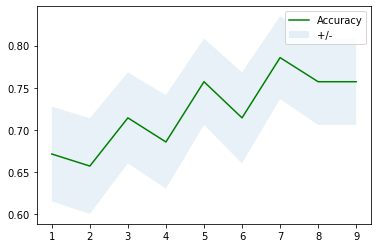

In [33]:
# plot the model
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc+1*std_acc,alpha=0.1)
plt.legend(('Accuracy',"+/- "))

we can see from the calculations and the plot that k=7 gives us the best accuracy

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
yD = df['loan_status']

In [36]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size=0.2,random_state=4)

In [37]:
loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
loanTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
# print out predTree and y_testset to visually compare predictions to actual values
predTree = loanTree.predict(X_testset)
print(predTree[0:10])
print(y_testset[0:10])

['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [39]:
from sklearn import metrics


In [40]:
# Decision Tree's accuracy:
DTree_accuracy = metrics.accuracy_score(y_testset,predTree)
DTree_accuracy

0.6142857142857143

In [49]:

# from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [58]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [43]:
df['loan_status'].unique().tolist()

['PAIDOFF', 'COLLECTION']

In [44]:
np.unique(y_trainset)
Feature.columns[0:8]

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

In [46]:
df['age'].min()

18

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state = 4)

In [52]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 4)
clf.fit(x_train, y_train)
clf.predict(x_test)

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDO

In [60]:
cn = ["PAIDOFF", 'COLLECTION']

In [63]:
fn = list(Feature.columns.values)

In [64]:
fn

['Principal',
 'terms',
 'age',
 'Gender',
 'weekend',
 'Bechalor',
 'High School or Below',
 'college']

[Text(167.4, 181.2, 'weekend <= -0.188\ngini = 0.306\nsamples = 69\nvalue = [13, 56]\nclass = COLLECTION'),
 Text(83.7, 108.72, 'age <= -0.404\ngini = 0.059\nsamples = 33\nvalue = [1, 32]\nclass = COLLECTION'),
 Text(41.85, 36.23999999999998, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = COLLECTION'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = COLLECTION'),
 Text(251.10000000000002, 108.72, 'age <= -1.234\ngini = 0.444\nsamples = 36\nvalue = [12, 24]\nclass = COLLECTION'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = PAIDOFF'),
 Text(292.95, 36.23999999999998, 'gini = 0.397\nsamples = 33\nvalue = [9, 24]\nclass = COLLECTION')]

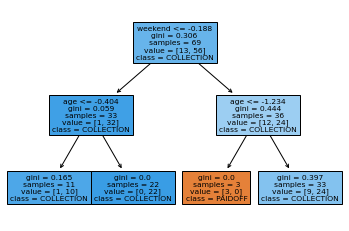

In [65]:
tree.plot_tree(clf,
              feature_names = fn,
              class_names = cn,
              filled=True)

In [47]:
dot_data = StringIO()
filename = "loanTree.png"
featureNames = Feature.columns
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'StringIO' is not defined

### Support Vector Machine

In [66]:
from sklearn import svm


In [77]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train,y_train)

SVC()

In [78]:
yhat = clf.predict(X_test)


In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
yhat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [81]:
print(confusion_matrix(y_test,yhat, labels=["COLLECTION", "PAIDOFF"]))

[[ 4 11]
 [ 7 48]]


In [82]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



In [100]:
# use the f1_score from sklearn library
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [95]:
y_test

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF'], dtype=object)

In [101]:
f1_score_weighted = f1_score(y_test, yhat, average='weighted')
jaccard_SVM = jaccard_score(y_test,yhat)

ValueError: pos_label=1 is not a valid label: array(['COLLECTION', 'PAIDOFF'], dtype='<U10')

In [102]:
print(f1_score_weighted)
print(jaccard_SVM)

0.6670522459996144


NameError: name 'jaccard_SVM' is not defined

## Logistic Regression

In [86]:
# Define X and y 
# X already normalized from earlier
print(X)
yD

[[ 0.51578458  0.92071769  2.33152555 ... -0.38170062  1.13639374
  -0.86968108]
 [ 0.51578458  0.92071769  0.34170148 ...  2.61985426 -0.87997669
  -0.86968108]
 [ 0.51578458 -0.95911111 -0.65321055 ... -0.38170062 -0.87997669
   1.14984679]
 ...
 [-1.31458942 -0.95911111  1.33661351 ... -0.38170062 -0.87997669
   1.14984679]
 [ 0.51578458  0.92071769 -0.48739188 ... -0.38170062 -0.87997669
   1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 ... -0.38170062 -0.87997669
   1.14984679]]


0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
          ...    
341    COLLECTION
342    COLLECTION
343    COLLECTION
344    COLLECTION
345    COLLECTION
Name: loan_status, Length: 346, dtype: object

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [88]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [89]:
yhat = LR.predict(X_test)

In [90]:
jaccard_similarity_score(y_test,yhat)

NameError: name 'jaccard_similarity_score' is not defined

In [91]:
confusion_matrix(y_test,yhat, labels=['COLLECTION','PAIDOFF'])

array([[ 2, 13],
       [ 9, 46]], dtype=int64)

In [92]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70

